In [30]:
#Logistic Regression
#imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from math import exp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#read in data
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/default.csv')
data.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [4]:
#change column to number
data['student_bin'] = data.student.map({'No':0,'Yes':1})

In [8]:
#let's do some cursory analysis
data.groupby('default').balance.mean()

default
0     803.94375
1    1747.82169
Name: balance, dtype: float64

In [9]:
data.groupby('default').income.mean()

default
0    33566.166625
1    32089.147124
Name: income, dtype: float64

In [10]:
# Set X and y
feature_cols = ['balance','income','student_bin']
X = data[feature_cols]
y = data.default

In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [12]:
#fit model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test) #Predict

In [13]:
# Access Accuracy
print metrics.accuracy_score(y_test,y_pred)

0.9728


In [14]:
#Null Accuracy Rate
#compare to null rate accuracy (null rate accuracy is the accuracy when using the majority as a predictor)
#there are several ways to do this

# 1. create a vector of majority class and use the accuracy_score
# "If I predict all 0's, how accurate would I be?
print metrics.accuracy_score(y_test,[0]*len(y_test))

0.9732


In [16]:
# 2. Calculate the mean of y_test (AKA the percentage of 1's)
y_test.mean()


0.0268

In [17]:
# One minus that number will be the percentage of 0's.
1 - y_test.mean()

0.9732

In [18]:
#This puts our accuracy score into some context. We didn't do so well.

In [20]:
### Interpretting Logistic Regression Coefficients

#Let's look at the coefficients
for col in zip(feature_cols, logreg.coef_[0]):
    print col[0],col[1]


balance 0.000431178655225
income -0.000123702863585
student_bin -2.43442213642e-06


In [23]:
#let's interpret those
for col in zip(feature_cols, logreg.coef_[0]):
    print 'A unit increase in', col[0], 'equals a', exp(col[1]), 'increase in odds.'

A unit increase in balance equals a 1.00043127163 increase in odds.
A unit increase in income equals a 0.999876304787 increase in odds.
A unit increase in student_bin equals a 0.999997565581 increase in odds.


In [24]:
### confusion matrix
# let's look at the confusion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print con_mat

[[2432    1]
 [  67    0]]


In [25]:
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat [1][1]
false_pos = con_mat[0][1]

In [26]:
# sensitivity: precent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print sensitivity
print metrics.recall_score(y_test,y_pred)

0.0
0.0


In [27]:
#specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print specificity

0.999588984792


In [28]:
#logistic regression thresholds
#logistic regression is actually predicting the underlying probability
#you can still predict the actual probability set thresholds if you'd like

#predict probabilities
logreg.predict_proba(X_test).shape
probs = logreg.predict_proba(X_test)[:,1]

In [29]:
#the natural threshold for probability is 0.5, but that's not always the case
preds_05 = np.where(probs > 0.5, 1, 0)
print metrics.accuracy_score(y_test, preds_05)
con_mat_05 = metrics.confusion_matrix(y_test, preds_05)
print con_mat_05

0.9728
[[2432    1]
 [  67    0]]


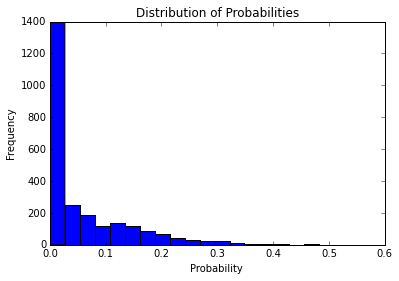

In [31]:
#let's look at the histogram of these probabilities
plt.hist(probs, bins = 20)
plt.title('Distribution of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [32]:
# change cutoff for predicting default to 0.2
preds_02 = np.where(probs > 0.2, 1, 0)
delta = float((preds_02 != preds_05).sum())/len(X_test)*100
print 'Changing the threshold from 0.5 to 0.2 changed %.2f percent of the predictions.' % delta

Changing the threshold from 0.5 to 0.2 changed 7.24 percent of the predictions.


In [33]:
# check the new accuracy, sensitivity, specificity
print metrics.accuracy_score(y_test, preds_02)
con_mat_02 = metrics.confusion_matrix(y_test, preds_02)
print con_mat_02

0.9084
[[2261  172]
 [  57   10]]


In [34]:
# let's define our true positivies, false positives, true negatives and false negatives
true_neg = con_mat_02[0][0]
false_neg = con_mat_02[1][0]
true_pos = con_mat_02[1][1]
false_pos = con_mat_02[0][1]

In [35]:
# sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print sensitivity
print metrics.recall_score(y_test, preds_02)

0.149253731343
0.149253731343


In [36]:
# specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print specificity

0.929305384299


In [37]:
### Exercise
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type'],
                 index_col='id')


In [38]:
# explore the data
df.shape # 214 x 10
df.head()
df.tail()
df.glass_type.value_counts()
df.isnull().sum() # No nulls in our data

ri            0
na            0
mg            0
al            0
si            0
k             0
ca            0
ba            0
fe            0
glass_type    0
dtype: int64

In [40]:
# convert the glass type column into a binary response
df['binary'] = df.glass_type.map({1:0,2:0,3:0,4:0,5:1,6:1,7:1})
df.binary.value_counts()

0    163
1     51
dtype: int64

In [41]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0


In [43]:
# Set X and y
feature_cols = ['ri','na','mg','al','si','ca','ba','fe']
X = df[feature_cols]
y = df.binary

In [44]:
# split the data into the appropriate training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [45]:
# create and fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test) #Predict

In [46]:
# calculate the accuracy rate of your model and compare it to the null accuracy
print metrics.accuracy_score(y_test,y_pred)

0.925925925926


In [47]:
y_test.mean()

0.2037037037037037

In [48]:
1 - y_test.mean()

0.7962962962962963

In [49]:
#another way to calculate null accuracy
metrics.accuracy_score(y_test,[0]*len(y_test))

0.79629629629629628

In [50]:
# create a confusion matrix for your predictions. calculate sensitivity and specificity
con_mat = metrics.confusion_matrix(y_test, y_pred)
print con_mat

[[41  2]
 [ 2  9]]


In [52]:
sensitivity = float(true_pos)/(false_neg + true_pos)
print sensitivity

0.149253731343


In [53]:
specificity = float(true_neg) / (true_neg + false_pos)
print specificity

0.929305384299
